In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from glob import glob
import os

import ar_analysis as ara
import processing as arp

In [2]:
exp_name_ctrl = 'c192L33_am4p0_amip_HIRESMIP_nudge_wind_1951_2020'
exp_name_p2K = 'c192L33_am4p0_amip_HIRESMIP_nudge_wind_1day_p2K'
data_ctrl_ds = xr.open_mfdataset(
    f'/archive/Marc.Prange/na_data/{exp_name_ctrl}/{exp_name_ctrl}_na_*.nc')
data_ctrl_winter_ds = data_ctrl_ds.isel(time=np.isin(data_ctrl_ds['time.month'], [11, 12, 1, 2, 3])).load()
data_p2K_ds = xr.open_mfdataset(
    f'/archive/Marc.Prange/na_data/{exp_name_p2K}/{exp_name_p2K}_na_*.nc')
data_p2K_winter_ds= data_p2K_ds.isel(time=np.isin(data_p2K_ds['time.month'], [11, 12, 1, 2, 3])).load()

/home/Marc.Prange/miniconda3/envs/AR_analysis/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


KeyboardInterrupt: 

In [4]:
xr.open_dataset(
    f'/archive/Marc.Prange/na_data/{exp_name_ctrl}/{exp_name_ctrl}_na_1990.nc').time

<xarray.DataArray 'time' (time: 365)>
array(['1990-01-01T00:00:00.000000000', '1990-01-02T00:00:00.000000000',
       '1990-01-03T00:00:00.000000000', ..., '1990-12-29T00:00:00.000000000',
       '1990-12-30T00:00:00.000000000', '1990-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-01-02 ... 1990-12-31

In [3]:
data_ctrl_winter = data_ctrl_winter_ds.mean('time')
data_p2K_winter = data_p2K_winter_ds.mean('time')

## Warming signal

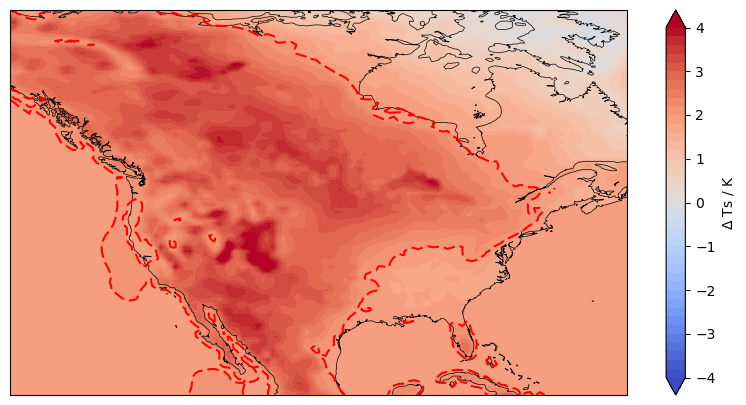

In [5]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
cf = ax.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.ts - data_ctrl_winter.ts), 
    levels=np.arange(-4, 4.2, 0.2), cmap='coolwarm', extend='both')
c = ax.contour(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.ts - data_ctrl_winter.ts), 
    levels=[2], colors='red', linestyles='dashed')
plt.colorbar(cf, label='$\Delta$ Ts / K')
ax.coastlines("50m", linewidth=0.5)
plt.savefig(
    'plots/p2K_analysis/na_warming_pattern.png', 
    dpi=300, bbox_inches='tight')

## Trends of precipitation

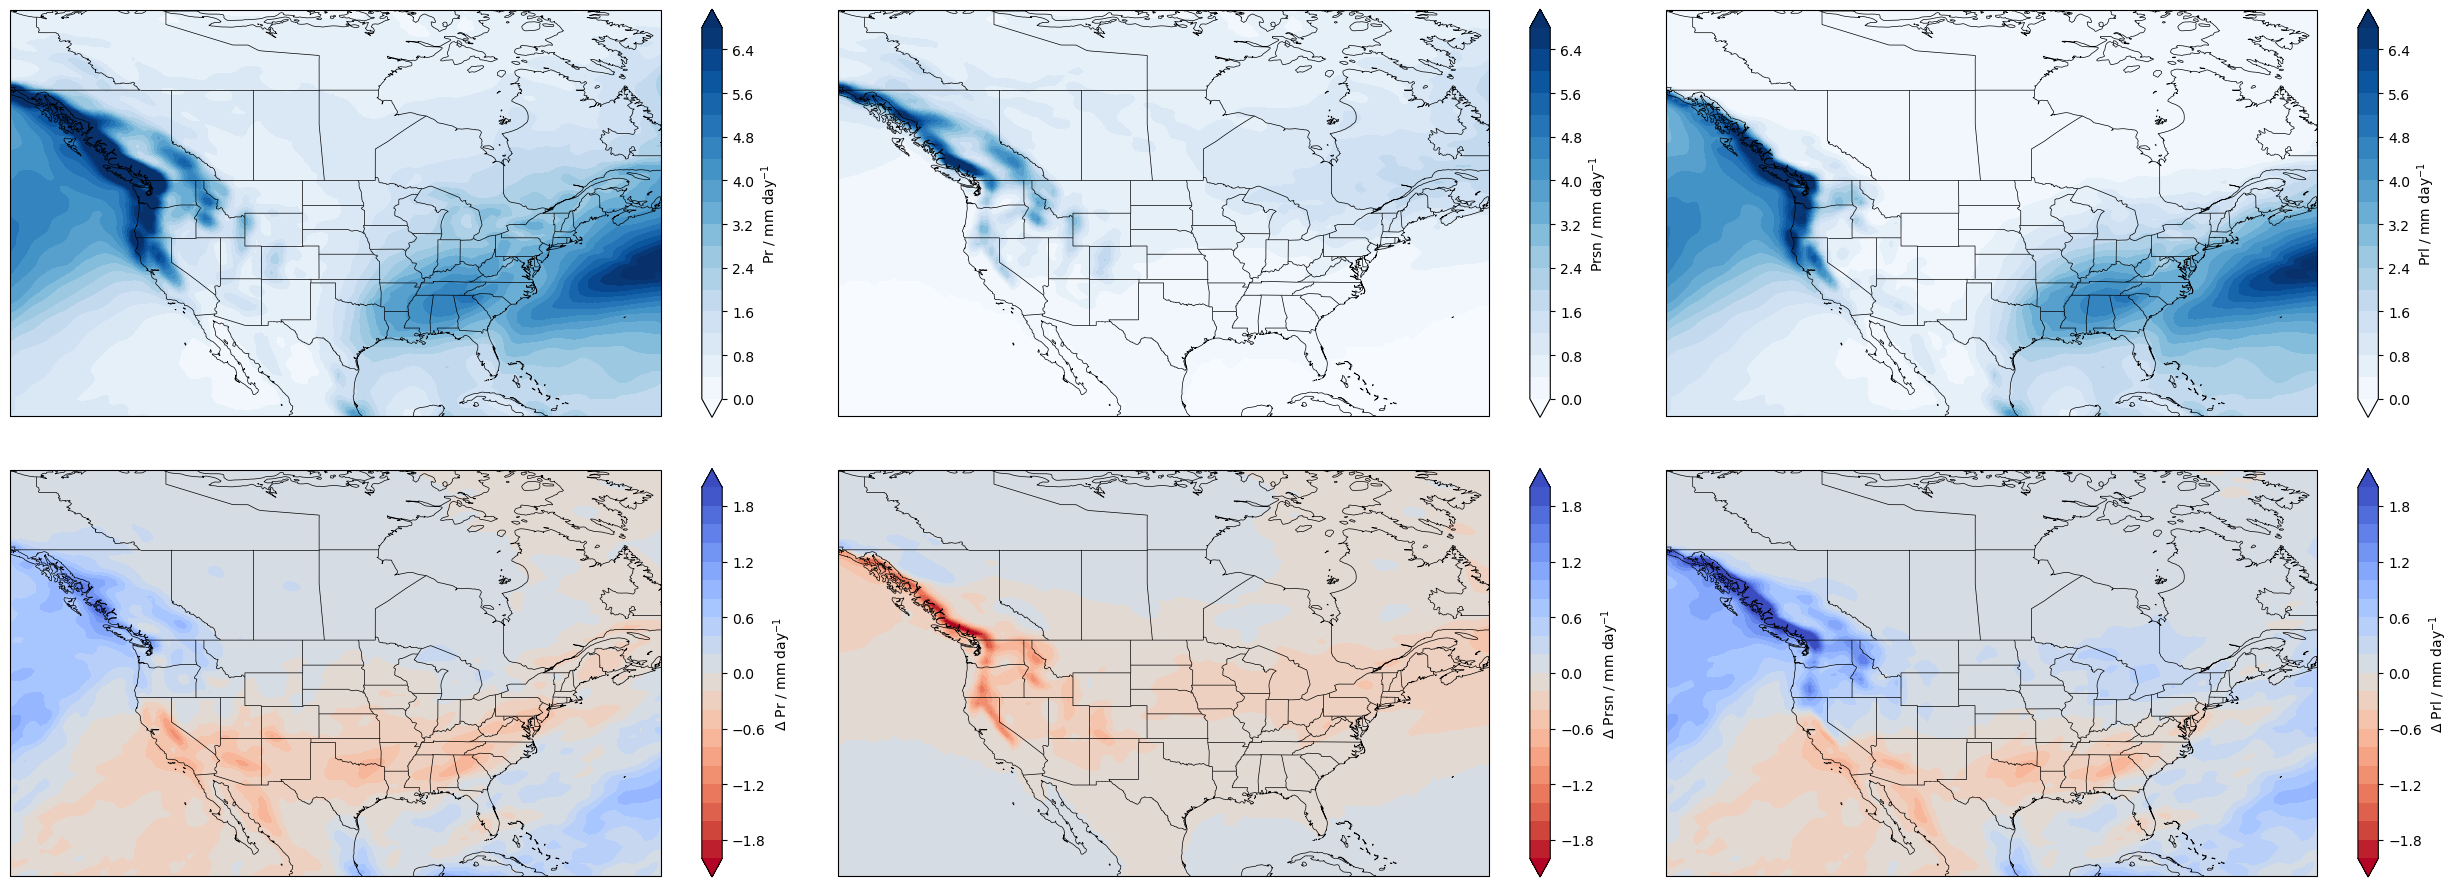

In [6]:
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(231, projection=ccrs.PlateCarree())
cf = ax1.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    data_ctrl_winter.pr*86400, 
    levels=np.arange(0, 7.2, 0.4), cmap='Blues', extend='both')
plt.colorbar(cf, label='Pr / mm day$^{-1}$', shrink=0.8)

ax2 = fig.add_subplot(232, projection=ccrs.PlateCarree())
cf = ax2.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    data_ctrl_winter.prsn*86400, 
    levels=np.arange(0, 7.2, 0.4), cmap='Blues', extend='both')
plt.colorbar(cf, label='Prsn / mm day$^{-1}$', shrink=0.8)

ax3 = fig.add_subplot(233, projection=ccrs.PlateCarree())
cf = ax3.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_ctrl_winter.pr - data_ctrl_winter.prsn)*86400, 
    levels=np.arange(0, 7.2, 0.4), cmap='Blues', extend='both')
plt.colorbar(cf, label='Prl / mm day$^{-1}$', shrink=0.8)

ax4 = fig.add_subplot(234, projection=ccrs.PlateCarree())
cf = ax4.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.pr - data_ctrl_winter.pr)*86400, 
    levels=np.arange(-2, 2.2, 0.2), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ Pr / mm day$^{-1}$', shrink=0.8)

ax5 = fig.add_subplot(235, projection=ccrs.PlateCarree())
cf = ax5.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.prsn - data_ctrl_winter.prsn)*86400, 
    levels=np.arange(-2, 2.2, 0.2), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ Prsn / mm day$^{-1}$', shrink=0.8)

ax6 = fig.add_subplot(236, projection=ccrs.PlateCarree())
cf = ax6.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    ((data_p2K_winter.pr - data_p2K_winter.prsn) - (data_ctrl_winter.pr - data_ctrl_winter.prsn))*86400, 
    levels=np.arange(-2, 2.2, 0.2), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ Prl / mm day$^{-1}$', shrink=0.8)

axs = [ax1, ax2, ax3, ax4, ax5, ax6]
[ax.coastlines("50m", linewidth=0.5) for ax in axs]
[ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='black', linewidth=0.5) for ax in axs]
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
[ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5) for ax in axs]
plt.tight_layout()
plt.savefig(
    'plots/p2K_analysis/na_precip_trends.png', 
    dpi=300, bbox_inches='tight')

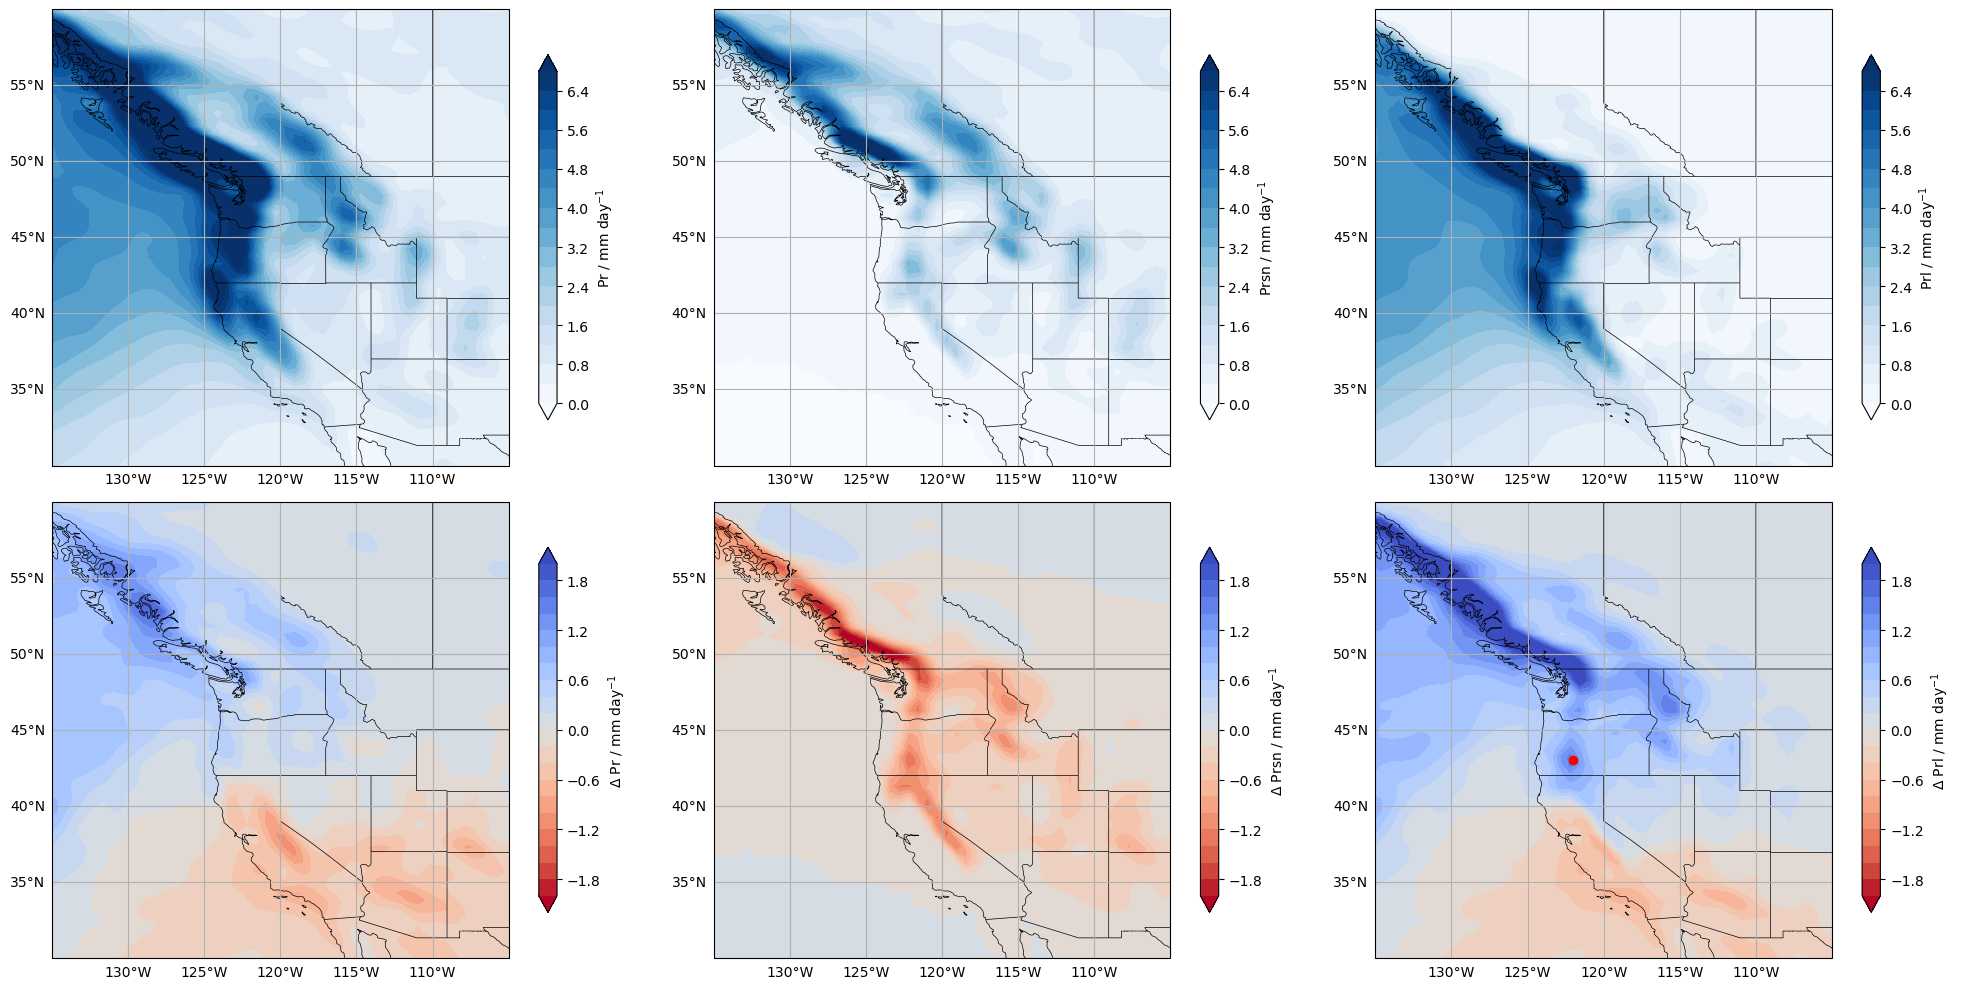

In [7]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(231, projection=ccrs.PlateCarree())
cf = ax1.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    data_ctrl_winter.pr*86400, 
    levels=np.arange(0, 7.2, 0.4), cmap='Blues', extend='both')
plt.colorbar(cf, label='Pr / mm day$^{-1}$', shrink=0.8)

ax2 = fig.add_subplot(232, projection=ccrs.PlateCarree())
cf = ax2.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    data_ctrl_winter.prsn*86400, 
    levels=np.arange(0, 7.2, 0.4), cmap='Blues', extend='both')
plt.colorbar(cf, label='Prsn / mm day$^{-1}$', shrink=0.8)

ax3 = fig.add_subplot(233, projection=ccrs.PlateCarree())
cf = ax3.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_ctrl_winter.pr - data_ctrl_winter.prsn)*86400, 
    levels=np.arange(0, 7.2, 0.4), cmap='Blues', extend='both')
plt.colorbar(cf, label='Prl / mm day$^{-1}$', shrink=0.8)

ax4 = fig.add_subplot(234, projection=ccrs.PlateCarree())
cf = ax4.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.pr - data_ctrl_winter.pr)*86400, 
    levels=np.arange(-2, 2.2, 0.2), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ Pr / mm day$^{-1}$', shrink=0.8)

ax5 = fig.add_subplot(235, projection=ccrs.PlateCarree())
cf = ax5.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.prsn - data_ctrl_winter.prsn)*86400, 
    levels=np.arange(-2, 2.2, 0.2), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ Prsn / mm day$^{-1}$', shrink=0.8)

ax6 = fig.add_subplot(236, projection=ccrs.PlateCarree())
cf = ax6.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    ((data_p2K_winter.pr - data_p2K_winter.prsn) - (data_ctrl_winter.pr - data_ctrl_winter.prsn))*86400, 
    levels=np.arange(-2, 2.2, 0.2), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ Prl / mm day$^{-1}$', shrink=0.8)

axs = [ax1, ax2, ax3, ax4, ax5, ax6]
[ax.coastlines("50m", linewidth=0.5) for ax in axs]
[ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='black', linewidth=0.5) for ax in axs]
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
[ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5) for ax in axs]
[ax.set_extent([-135, -105, 30, 60], crs=ccrs.PlateCarree()) for ax in axs]
gls = [ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False) for ax in axs]
ax6.scatter(-122, 43, color='red')
for gl in gls:
    gl.top_labels = False
    gl.right_labels = False
plt.tight_layout()
plt.savefig(
    'plots/p2K_analysis/western_na_precip_trends.png', 
    dpi=300, bbox_inches='tight')

## Trends in land hydrology

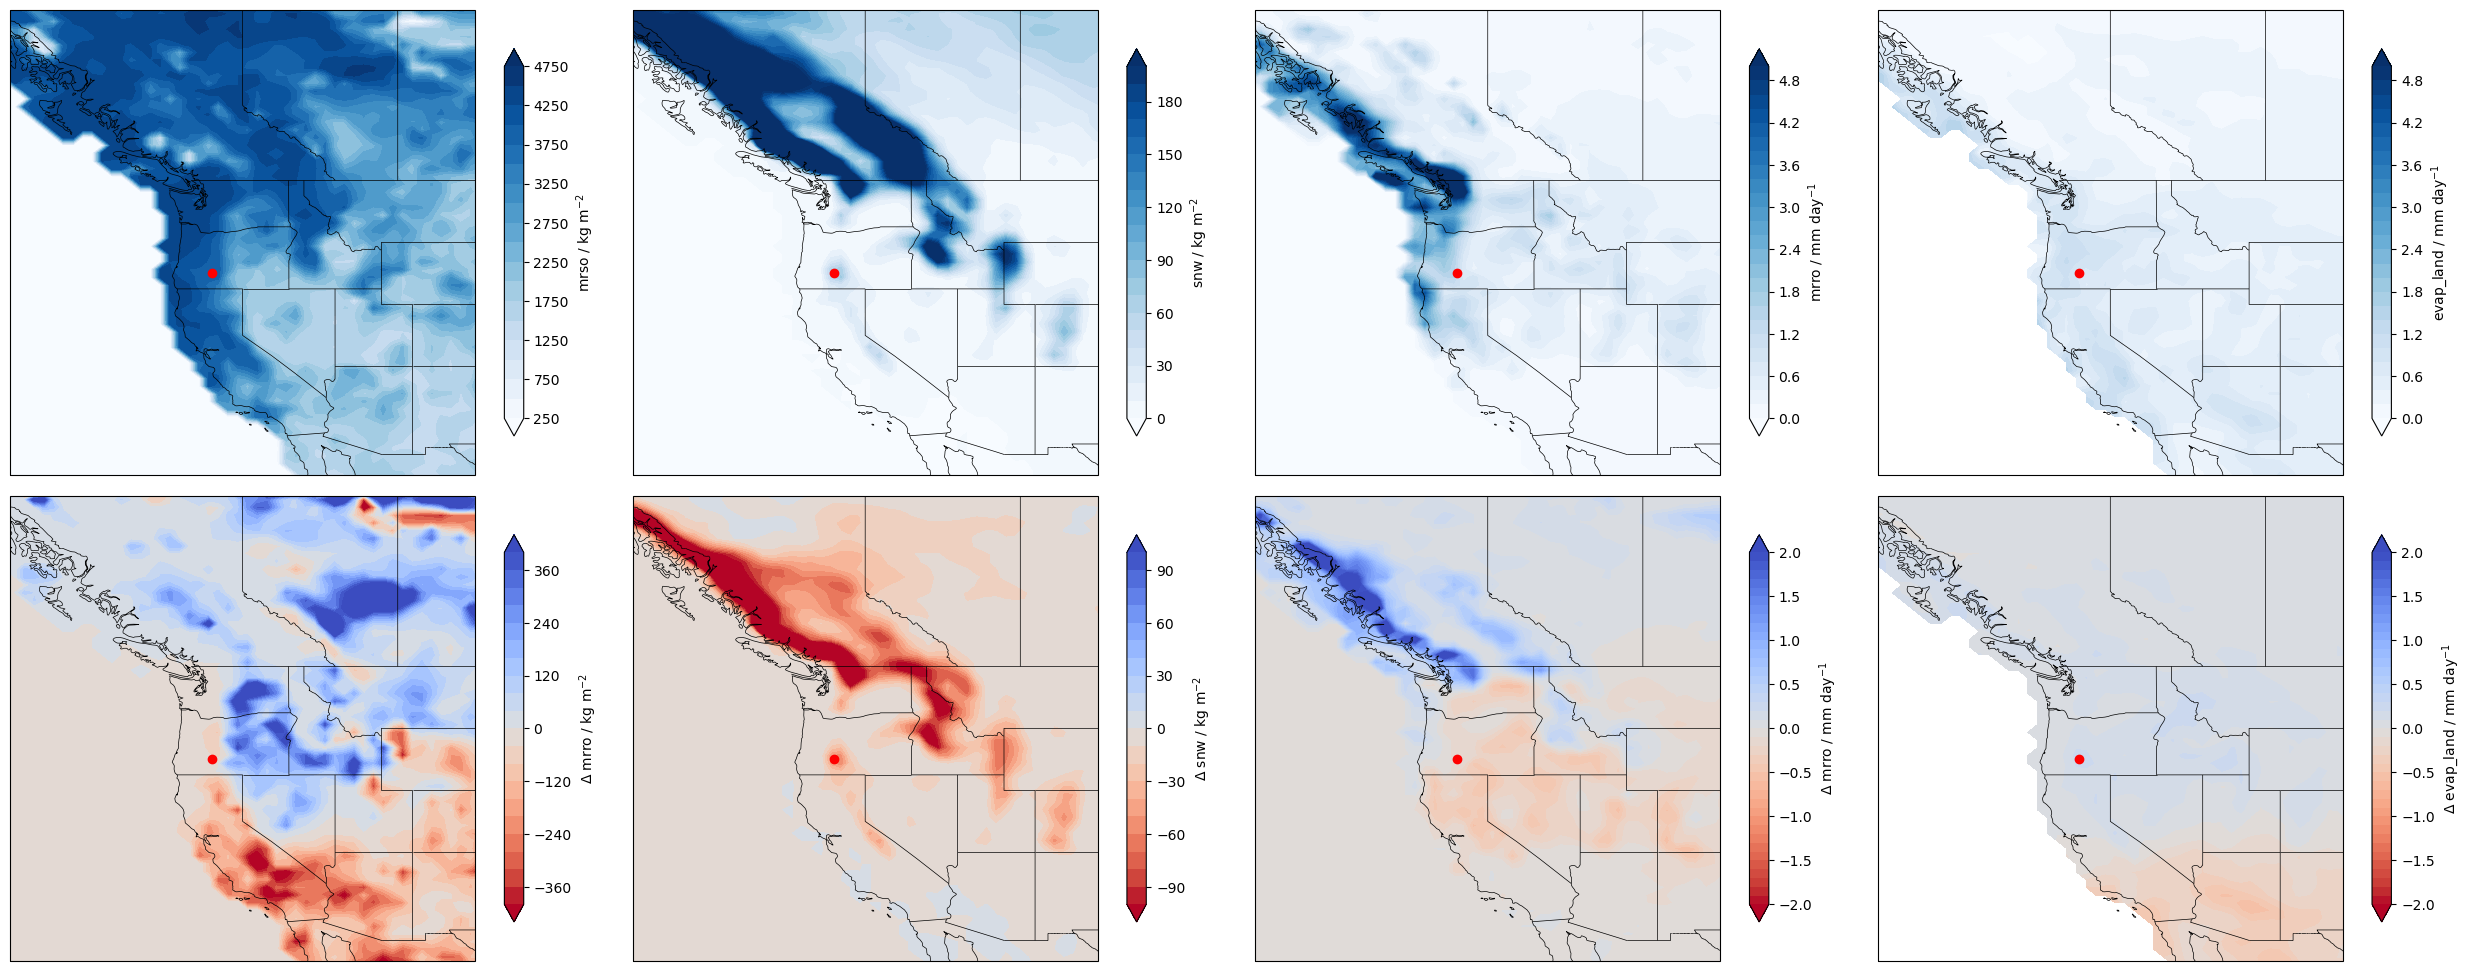

In [10]:
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(241, projection=ccrs.PlateCarree())
cf = ax1.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    data_ctrl_winter.mrso, 
    levels=20, cmap='Blues', extend='both')
plt.colorbar(cf, label='mrso / kg m$^{-2}$', shrink=0.8)

ax2 = fig.add_subplot(242, projection=ccrs.PlateCarree())
cf = ax2.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    data_ctrl_winter.snw, 
    levels=np.arange(0, 210, 10), cmap='Blues', extend='both')
plt.colorbar(cf, label='snw / kg m$^{-2}$', shrink=0.8)

ax3 = fig.add_subplot(243, projection=ccrs.PlateCarree())
cf = ax3.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    data_ctrl_winter.mrro*86400, 
    levels=np.arange(0, 5.2, 0.2), cmap='Blues', extend='both')
plt.colorbar(cf, label='mrro / mm day$^{-1}$', shrink=0.8)

ax4 = fig.add_subplot(244, projection=ccrs.PlateCarree())
cf = ax4.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    data_ctrl_winter.evap_land*86400, 
    levels=np.arange(0, 5.2, 0.2), cmap='Blues', extend='both')
plt.colorbar(cf, label='evap_land / mm day$^{-1}$', shrink=0.8)

ax5 = fig.add_subplot(245, projection=ccrs.PlateCarree())
cf = ax5.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.mrso - data_ctrl_winter.mrso), 
    levels=np.arange(-400, 440, 40), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ mrro / kg m$^{-2}$', shrink=0.8)

ax6 = fig.add_subplot(246, projection=ccrs.PlateCarree())
cf = ax6.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.snw - data_ctrl_winter.snw), 
    levels=np.arange(-100, 110, 10), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ snw / kg m$^{-2}$', shrink=0.8)

ax7 = fig.add_subplot(247, projection=ccrs.PlateCarree())
cf = ax7.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.mrro - data_ctrl_winter.mrro)*86400, 
    levels=np.arange(-2, 2.1, 0.1), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ mrro / mm day$^{-1}$', shrink=0.8)

ax8 = fig.add_subplot(248, projection=ccrs.PlateCarree())
cf = ax8.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.evap_land - data_ctrl_winter.evap_land)*86400, 
    levels=np.arange(-2, 2.1, 0.1), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ evap_land / mm day$^{-1}$', shrink=0.8)

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
[ax.coastlines("50m", linewidth=0.5) for ax in axs]
[ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='black', linewidth=0.5) for ax in axs]
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
[ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5) for ax in axs]
[ax.set_extent([-135, -105, 30, 60], crs=ccrs.PlateCarree()) for ax in axs]
[ax.scatter(-122, 43, color='red') for ax in axs]
plt.tight_layout()
plt.savefig(
    'plots/p2K_analysis/western_na_land_hydrology_trends.png', 
    dpi=300, bbox_inches='tight')

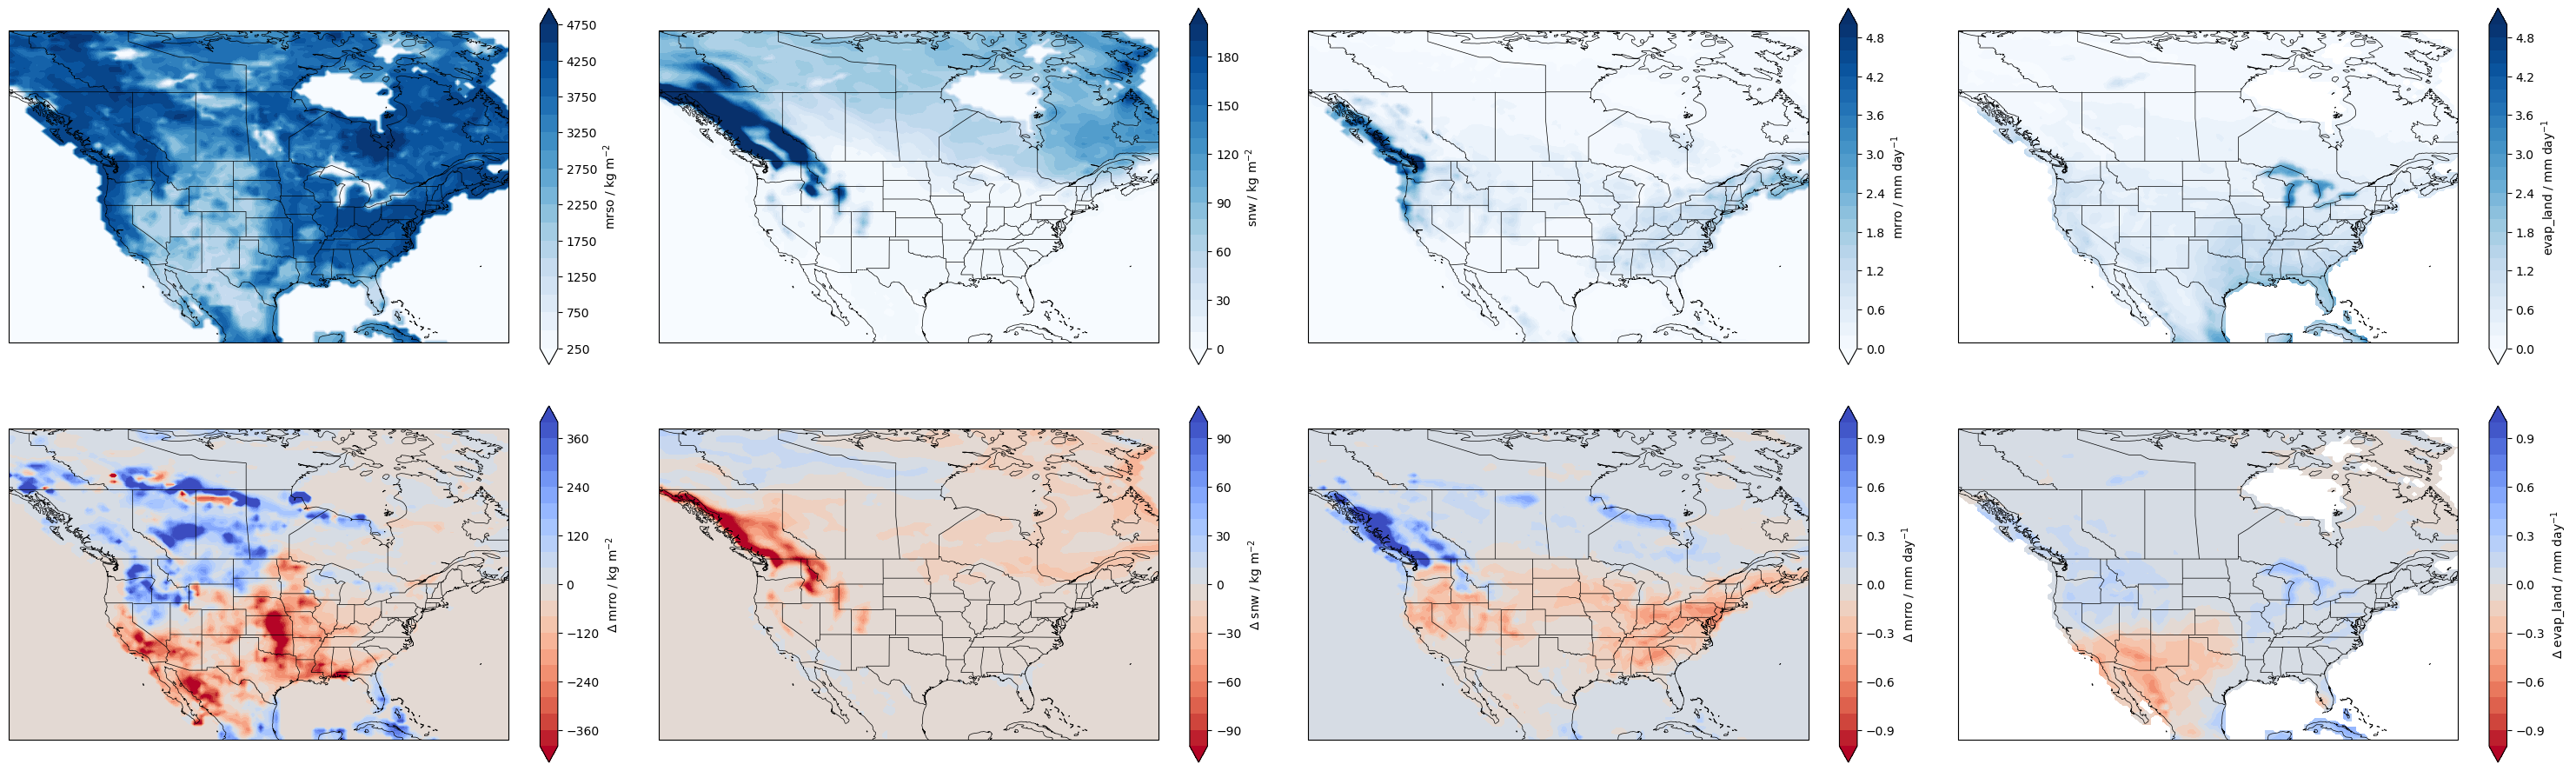

In [9]:
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(241, projection=ccrs.PlateCarree())
cf = ax1.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    data_ctrl_winter.mrso, 
    levels=20, cmap='Blues', extend='both')
plt.colorbar(cf, label='mrso / kg m$^{-2}$', shrink=0.8)

ax2 = fig.add_subplot(242, projection=ccrs.PlateCarree())
cf = ax2.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    data_ctrl_winter.snw, 
    levels=np.arange(0, 210, 10), cmap='Blues', extend='both')
plt.colorbar(cf, label='snw / kg m$^{-2}$', shrink=0.8)

ax3 = fig.add_subplot(243, projection=ccrs.PlateCarree())
cf = ax3.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    data_ctrl_winter.mrro*86400, 
    levels=np.arange(0, 5.2, 0.2), cmap='Blues', extend='both')
plt.colorbar(cf, label='mrro / mm day$^{-1}$', shrink=0.8)

ax4 = fig.add_subplot(244, projection=ccrs.PlateCarree())
cf = ax4.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    data_ctrl_winter.evap_land*86400, 
    levels=np.arange(0, 5.2, 0.2), cmap='Blues', extend='both')
plt.colorbar(cf, label='evap_land / mm day$^{-1}$', shrink=0.8)

ax5 = fig.add_subplot(245, projection=ccrs.PlateCarree())
cf = ax5.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.mrso - data_ctrl_winter.mrso), 
    levels=np.arange(-400, 440, 40), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ mrro / kg m$^{-2}$', shrink=0.8)

ax6 = fig.add_subplot(246, projection=ccrs.PlateCarree())
cf = ax6.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.snw - data_ctrl_winter.snw), 
    levels=np.arange(-100, 110, 10), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ snw / kg m$^{-2}$', shrink=0.8)

ax7 = fig.add_subplot(247, projection=ccrs.PlateCarree())
cf = ax7.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.mrro - data_ctrl_winter.mrro)*86400, 
    levels=np.arange(-1, 1.1, 0.1), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ mrro / mm day$^{-1}$', shrink=0.8)

ax8 = fig.add_subplot(248, projection=ccrs.PlateCarree())
cf = ax8.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.evap_land - data_ctrl_winter.evap_land)*86400, 
    levels=np.arange(-1, 1.1, 0.1), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ evap_land / mm day$^{-1}$', shrink=0.8)

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
[ax.coastlines("50m", linewidth=0.5) for ax in axs]
[ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='black', linewidth=0.5) for ax in axs]
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
[ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5) for ax in axs]
plt.tight_layout()
plt.savefig(
    'plots/p2K_analysis/na_land_hydrology_trends.png', 
    dpi=300, bbox_inches='tight')

## Runoff / liquid precip trend

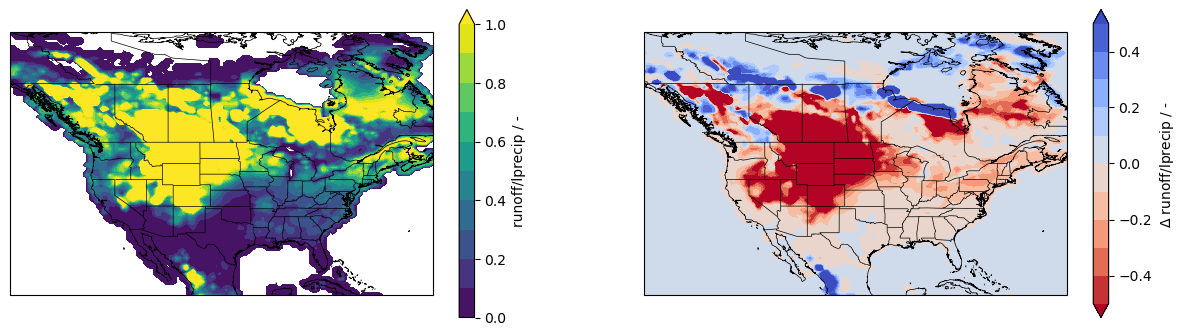

In [28]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
c1 = ax1.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    data_ctrl_winter.mrro / data_ctrl_winter.prli, levels=np.arange(0, 1.1, 0.1), extend='max')
plt.colorbar(c1, label='runoff/lprecip / -', shrink=0.8)
ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree())
c2 = ax2.contourf(
    data_ctrl_winter.lon, data_ctrl_winter.lat, 
    (data_p2K_winter.mrro / data_p2K_winter.prli - data_ctrl_winter.mrro / data_ctrl_winter.prli), 
    levels=np.arange(-0.5, 0.6, 0.1), cmap='coolwarm_r', extend='both')
plt.colorbar(c2, label='$\Delta$ runoff/lprecip / -', shrink=0.8)
for ax in [ax1, ax2]:
    # ax.set_extent([-135, -105, 30, 60], crs=ccrs.PlateCarree())
    ax.coastlines("10m", linewidth=0.5)
    # axis.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='tab:blue', edgecolor='tab:blue', linewidth=0.5)
    # axis.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue', linewidth=0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='black', linewidth=0.5)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)